Define the computational complexity as number of basic operations in each task. Here base on Bayes rule, the basic operation will be multiplication and division or all math operations for completeness

Note, by assuming people use fractions to calculate, need to perform this simulations again with different complexity considerations

I am trying to write a function that simulates people's calculation procedure of applying Bayes rule in belief updating task

Task Description: There are k number of urns each contain a certarin number of balls that are coloured as m different colours. 

The distributions of coloured balls in the urns and the prior probabilities that each urns will be selected will be given to participants. 

A series of ball draws will then be performed from only one of the k urns, but the participant will not know which urn is it. The only evidence they can observe is the sequential ball draw outcome (i.e. the colour of the ball that are drawn). So participants would need to update their belief of the chosen urn using the prior probabilities of selection, ball colour composition, and the evidences from sequential ball draws.

After observing the ball draw, participants are then asked to report the chosen urn in this trial and then asked to report the posterior probability of the reported urn is indeed the chosen urn and then their confidence of their estimation compared to the truth value defined as Bayesian updating posterior.

Input: The composition of balls in each urn, Prior probability of each urn is selected, number of urns, number of colours, incentive, number of sequential updates needed to compute

Output: Report the urn that is most likely to be chosen and the (posterior) probability of all urns after belief updating procedure

1. Input hyperparameter number of urns (2,3) and colours (2,3,4), control ball compositions 2-2:(80-20, 20-80), 2-3:(70-20-10, 20-10-70), 2-4:(40-30-20-10, 10-20-30-40), 3-2:(80-20, 50-50, 20-80), 3-3:(70-20-10, 40-30-30, 20-10-70), 3-4:(40-30-20-10, 25-25-25-25 ,10-20-30-40)
2. Define priors

$P(urn = 1| col = 1) = \frac{P(col = 1| urn = 1) \cdot P(urn = 1)}{P(col = 1)} = \frac{P(col = 1| urn = 1) \cdot P(urn = 1)}{\sum_{i=1}^{k} {P(col = 1 | urn = i)* P(urn = i)}}$

$P(urn = 2| col = 1) = \frac{P(col = 1| urn = 2) \cdot P(urn = 2)}{P(col = 1)} = \frac{P(col = 1| urn = 2) \cdot P(urn = 2)}{\sum {P(col = 1 | urn = i)* P(urn = i)}}$


In [1]:
def bayesian_Updating(num_urns, num_col, ball_draws, ball_comp = dict()):
    '''
    num_urns: number of urns in the experiment
    num_cols: number of ball colours in the experiment
    ball_draws: a list of ball draw event outcomes. e.g. ['col1','col2']
    ball_comp: a dictionary of ball compositions in each urn. Key: (num_urns, num_cols), Values: a dictionary with keys being name of the conditional probability (e.g.p_col1_u1 probability of colour = 1 conditional on urn = 1) values being conditional probability
    output: a rounded (2 decimal points) dictionary of posterior
    '''
    assert type(num_urns) == int, "num_urns must be integer"
    assert type(num_col) == int, "num_col must be integer"
    assert type(ball_draws) == list, "ball_draws must be a list of events"
    assert type(ball_comp) == dict, "ball_comp must be a pre-defined dictionary of ball compositions"

    # default experimental design
    if not ball_comp:
        ball_comp = {(2,2):{'p_col1_u1':0.8, 'p_col2_u1':0.2, 'p_col1_u2':0.2, 'p_col2_u2':0.8}, 
             (2,3):{'p_col1_u1':0.7, 'p_col2_u1':0.2, 'p_col3_u1':0.1, 'p_col1_u2':0.2, 'p_col2_u2':0.1, 'p_col3_u2':0.7},
             (2,4):{'p_col1_u1':0.4, 'p_col2_u1':0.3, 'p_col3_u1':0.2, 'p_col4_u1':0.1, 'p_col1_u2':0.1, 'p_col2_u2':0.2, 'p_col3_u2':0.3, 'p_col4_u2':0.4},
             (3,2):{'p_col1_u1':0.8, 'p_col2_u1':0.2, 'p_col1_u2':0.5, 'p_col2_u2':0.5, 'p_col1_u3':0.2, 'p_col2_u3':0.8},
             (3,3):{'p_col1_u1':0.7, 'p_col2_u1':0.2, 'p_col3_u1':0.1, 'p_col1_u2':0.4, 'p_col2_u2':0.3, 'p_col3_u2':0.3, 'p_col1_u3':0.2, 'p_col2_u3':0.1, 'p_col3_u3':0.7},
             (3,4):{'p_col1_u1':0.4, 'p_col2_u1':0.3, 'p_col3_u1':0.2, 'p_col4_u1':0.1, 'p_col1_u2':0.25, 'p_col2_u2':0.25, 'p_col3_u2':0.25, 'p_col4_u2':0.25, 'p_col1_u3':0.1, 'p_col2_u3':0.2, 'p_col3_u3':0.3, 'p_col4_u3':0.4}
}
    # initialize priors
    # directly told participants so no basic operations needed in the first draw
    # In subsequent draws, priors equals to the calculated posterior, so no basic operations needed
    # However, a side note: space complexity is added since people need to remember and keep track
    
    prior_dict = {}
    for urn in range(1, num_urns+1):
        prior_dict[f"prior_u{urn}"] = 1/num_urns

    # get ball composition probabilities - Likelihood
    # num_urns * num_cols basic operation in the worst case when you need to keep track of all colours
    # num_urns basic operation in the best case when only 1 colours is drawn in the sequential sampling
    relevant_p = ball_comp[(num_urns,num_col)]

    # Sequential Ball Draws using Bayesian Updating
    for seq in range(len(ball_draws)):
        # calculate/update evidence
        # ignore summation, (num_urns-1) * num_cols basic operations in the worst case
        # not ignoring summation, 2 * num_urns * num_col - 1 times calculations in the worst case
        # In the best case, you can count the balls and make 1 division (BO) per colour in the first round only, so that's in total n_cols - 1 BO
        evidence_dict = {}
        for col in range(1, num_col+1):
            sum = 0
            for urn in range(1, num_urns+1):
                sum += prior_dict[f"prior_u{urn}"] * relevant_p[f"p_col{col}_u{urn}"]

            evidence_dict[f"p_col{col}"] = sum

        # calculate posterior
        # 2 * (num_urns - 1) basic operation in the worst case since the conditional probability of all urns sum to 1 
        # if we count summation/substraction, basic operation is 2 * num_urns
        posterior_dict = {}
        for urn in range(1, num_urns+1):
            event =  ball_draws[seq]
            posterior_dict[f"posterior_u{urn}_{event}"] = (prior_dict[f"prior_u{urn}"] * relevant_p[f"p_{event}_u{urn}"]) / evidence_dict[f"p_{event}"]
            # Update the prior using posterior
            prior_dict[f"prior_u{urn}"] =  posterior_dict[f"posterior_u{urn}_{event}"]

    rounded_dict = {key: round(value, 2) for key, value in posterior_dict.items()}
    O_basic_operations = num_urns * num_col + len(ball_draws) * ((num_urns-1) * num_col + 2 * (num_urns - 1)) 
    #print(f"The worst case complexity is {O_basic_operations} number of basic operations when number of urns = {num_urns}, number of colours = {num_col}, sequential sampling = {len(ball_draws)}")
    return rounded_dict

In [2]:
# Experimental Design: Ball compositions and define the maximum number of urns = 4 and maximum number of colours = 4
ball_comp = {(2,2):{'p_col1_u1':0.7, 'p_col2_u1':0.3, 'p_col1_u2':0.3, 'p_col2_u2':0.7}, 
             (2,3):{'p_col1_u1':0.7, 'p_col2_u1':0.2, 'p_col3_u1':0.1, 'p_col1_u2':0.2, 'p_col2_u2':0.1, 'p_col3_u2':0.7},
             (2,4):{'p_col1_u1':0.4, 'p_col2_u1':0.3, 'p_col3_u1':0.2, 'p_col4_u1':0.1, 'p_col1_u2':0.1, 'p_col2_u2':0.2, 'p_col3_u2':0.3, 'p_col4_u2':0.4},
             (3,2):{'p_col1_u1':0.7, 'p_col2_u1':0.3, 'p_col1_u2':0.5, 'p_col2_u2':0.5, 'p_col1_u3':0.3, 'p_col2_u3':0.7},
             (3,3):{'p_col1_u1':0.7, 'p_col2_u1':0.2, 'p_col3_u1':0.1, 'p_col1_u2':0.1, 'p_col2_u2':0.7, 'p_col3_u2':0.2, 'p_col1_u3':0.2, 'p_col2_u3':0.1, 'p_col3_u3':0.7},
             (3,4):{'p_col1_u1':0.4, 'p_col2_u1':0.3, 'p_col3_u1':0.2, 'p_col4_u1':0.1, 'p_col1_u2':0.3, 'p_col2_u2':0.2, 'p_col3_u2':0.2, 'p_col4_u2':0.3, 'p_col1_u3':0.1, 'p_col2_u3':0.2, 'p_col3_u3':0.3, 'p_col4_u3':0.4},
             (4,2):{'p_col1_u1':0.7, 'p_col2_u1':0.3, 'p_col1_u2':0.6, 'p_col2_u2':0.4, 'p_col1_u3':0.4, 'p_col2_u3':0.6, 'p_col1_u4':0.3, 'p_col2_u4':0.7},
             (4,3):{'p_col1_u1':0.7, 'p_col2_u1':0.2, 'p_col3_u1':0.1, 'p_col1_u2':0.1, 'p_col2_u2':0.7, 'p_col3_u2':0.2, 'p_col1_u3':0.2, 'p_col2_u3':0.1, 'p_col3_u3':0.7, 'p_col1_u4':0.3, 'p_col2_u4':0.4, 'p_col3_u4':0.3},
             (4,4):{'p_col1_u1':0.4, 'p_col2_u1':0.3, 'p_col3_u1':0.2, 'p_col4_u1':0.1, 'p_col1_u2':0.3, 'p_col2_u2':0.4, 'p_col3_u2':0.1, 'p_col4_u2':0.2, 'p_col1_u3':0.2, 'p_col2_u3':0.1, 'p_col3_u3':0.4, 'p_col4_u3':0.3, 'p_col1_u4':0.1, 'p_col2_u4':0.2, 'p_col3_u4':0.3, 'p_col4_u4':0.4}
}

bayesian_Updating(num_urns=4, num_col=4, ball_draws=['col2','col1','col1'], ball_comp=ball_comp)


{'posterior_u1_col1': 0.53,
 'posterior_u2_col1': 0.4,
 'posterior_u3_col1': 0.04,
 'posterior_u4_col1': 0.02}

In [15]:
ball_comp = {(2,2):{'p_col1_u1':0.4, 'p_col2_u1':0.6, 'p_col1_u2':0.6, 'p_col2_u2':0.4},
        (3,2):{'p_col1_u1':0.75, 'p_col2_u1':0.25, 'p_col1_u2':0.5, 'p_col2_u2':0.5, 'p_col1_u3':0.25, 'p_col2_u3':0.75}}

bayesian_Updating(num_urns=3, num_col=2, ball_draws=['col1','col2'], ball_comp=ball_comp)

{'posterior_u1_col2': 0.3, 'posterior_u2_col2': 0.4, 'posterior_u3_col2': 0.3}

# Simulation

In [3]:
import numpy as np
np.arange(1,5)

array([1, 2, 3, 4])

In [17]:
import numpy as np

def simulate_ball_draws( k, c, n, ball_comp):
    """
    Simulate a sequence of ball draws.

    Parameters:
        n (int): Length of the sequence.
        ball composition: a dict of dict. keys of first dict is number of urns and number of colours, the second key is p_colj_uk
        total number of urns k, 
        total number of colours c,

    Returns:
        list: Simulated sequence of ball draws.
    """

    # generate urn number list
    urns = np.arange(1,k+1)
    # generate colour list
    colors = np.arange(1,c+1)

    # randomly choose a urn to draw n balls with replacement
    chosen_urn = np.random.choice(urns)

    # grab relevant experimental design base on k and c
    probabilities_dict = ball_comp[(k, c)]
    # get probability list for np.random.choice from experiment design
    # first element is p_col1_chosenUrn, p_col2_chosenUrn...
    probabilities = []
    for col in range(1,c+1):
        probabilities.append(probabilities_dict[f"p_col{col}_u{chosen_urn}"])
    return np.random.choice(colors, size=n, p=probabilities)

sequence = simulate_ball_draws(k=4,c=4, n=100, ball_comp=ball_comp)
print(sequence)

from collections import Counter
Counter(sorted(sequence))

[1 3 3 4 4 4 3 3 3 1 3 2 1 4 4 3 3 1 3 2 4 4 4 1 3 4 3 4 4 4 4 2 3 4 2 3 1
 1 2 1 1 2 4 3 4 3 3 2 4 4 3 1 4 4 3 3 1 4 3 3 2 1 4 2 3 3 1 3 4 4 1 4 3 1
 3 3 1 3 3 4 3 3 1 3 1 1 4 1 4 3 3 3 1 3 4 3 3 3 1 3]


Counter({1: 22, 2: 9, 3: 40, 4: 29})

In [11]:
def basic_operations_decimal(k, j, n, ball_comp):
    """
    Parameters: number of urns k, number of colours j, number of sequential ball draws n

    Returns: The number of multiplications/divisions needed and number of total calculations needed (MDAS)
    """
    assert k >= 2, "number of urns must be greater or equals to 2"
    assert j >= 2, "number of colours must be greater or equals to 2"
    assert n >= 1, "number of ball draws must be greater or equals to 1"

    # Initialize MD and MDAS as the first draw complexity as it does depend on the ball draw
    MD = min(3*k + 1, 3*k - 2)
    MDAS = min(3*k + 1, 4*k - 2)
    seen_col = []

    ball_draws = simulate_ball_draws(k, j, n, ball_comp)
    for ball_col in ball_draws[1:]:
        if ball_col not in seen_col:
            seen_col.append(ball_col)
            MD += min(4*k, 4*k - 3)
            MDAS += min(5*k, 6*k - 3)
        else:
            MD += min(3*k, 3*k - 2)
            MDAS += min(4*k, 5*k - 2)
    return MD, MDAS



In [18]:
def BO_urn_firstDraw(k, c, n, ball_comp):
    """
    Parameters: number of urns k, number of colours c, number of sequential ball draws n

    Returns: The number of multiplications/divisions needed and number of total calculations needed (MDAS) to compute all the posteriors for each urn given the first ball draw outcomes
    Note: MDAS assume AS is as expensive as MD
    As an alternative: we can assume AS is  50%  cheaper than MD
    """
    assert k >= 2, "number of urns must be greater or equals to 2"
    assert c >= 2, "number of colours must be greater or equals to 2"
    assert n >= 1, "number of ball draws must be greater or equals to 1"

    MD = 2*(k-1)
    MDAS = min(2*k, 2*(k-1)+(k-1))

    return MD, MDAS

def BO_urn_subsequentDraws(k, c, n, ball_comp):
    """
    Parameters: number of urns k, number of colours c, number of sequential ball draws n

    Returns: The number of multiplications/divisions needed and number of total calculations needed (MDAS) to compute all the posteriors for each urn given all the subsequent ball draw outcomes
    Note: MDAS assume AS is as expensive as MD
    As an alternative: we can assume AS is  50%  cheaper than MD
    """
    assert k >= 2, "number of urns must be greater or equals to 2"
    assert c >= 2, "number of colours must be greater or equals to 2"
    assert n >= 1, "number of ball draws must be greater or equals to 1"

    MD = (k-1) * (k+2)
    MDAS = (k-1) * ((k+2)+(k+1)) + (k-1)

    return MD, MDAS

def BO_col(k, c, n, ball_comp):
    """
    Parameters: number of urns k, number of colours c, number of sequential ball draws n

    Returns: The number of multiplications/divisions needed and number of total calculations needed (MDAS) to compute all the posteriors for each colour given all the ball draw outcomes
    Note: MDAS assume AS is as expensive as MD
    As an alternative: we can assume AS is  50%  cheaper than MD
    """
    assert k >= 2, "number of urns must be greater or equals to 2"
    assert c >= 2, "number of colours must be greater or equals to 2"
    assert n >= 1, "number of ball draws must be greater or equals to 1"

    MD = (c-1) * k
    MDAS = min( c * (k + (k-1)), (c-1) * (k + (k-1)) + (c-1) )

    return MD, MDAS


In [11]:
display(BO_urn_firstDraw(4,4,2,ball_comp))
display(BO_urn_subsequentDraws(4,4,2,ball_comp))
display(BO_col(4,4,2,ball_comp))

(6, 8)

(18, 36)

(12, 24)

In [12]:
display(BO_urn_firstDraw(2,2,2,ball_comp))
display(BO_urn_subsequentDraws(2,2,2,ball_comp))
display(BO_col(2,2,2,ball_comp))

(2, 3)

(4, 8)

(2, 4)

In [ ]:
def difficulty()

In [7]:


def simulation(k, c, n, ball_comp, num_sim):
    '''
    Parameters: number of urns k, number of colours c, number of sequential ball draws n, num_sim is number of simulation ball draw for each experiment design

    Returns: The min, average, max number of basic operations needed for this experimental design
    '''
    MD_lis = []
    MDAS_lis = []
    for i in range(num_sim):
        MD, MDAS = BO_urn_firstDraw(k, c, n, ball_comp) + BO_urn_subsequentDraws(k, c, n, ball_comp)
        MD_lis.append(MD)
        MDAS_lis.append(MDAS)
    MD_dict = {'min': min(MD_lis), 'avg': np.mean(MD_lis), 'max': max(MD_lis)}
    MDAS_dict = {'min': min(MDAS_lis), 'avg': np.mean(MDAS_lis), 'max': max(MDAS_lis)}

    return MD_dict, MDAS_dict

simulation(2,2,4, ball_comp, 1000)

ValueError: too many values to unpack (expected 2)

In [ ]:
# Define the possible experimental design: max urns, max colours, max ball draws
num_urns_lis = [2,3]
num_col_lis = [2,3,4]
seq_lis = [1,2,3,4]

simulation_times = 10000

MD_min_dict = {}
MD_max_dict = {}
MD_avg_dict = {}
MDAS_min_dict = {}
MDAS_max_dict = {}
MDAS_avg_dict = {}


for num_urns in num_urns_lis:
    for num_col in num_col_lis:
        for ball_draws in seq_lis:
            MD_dict, MDAS_dict = simulation(k=num_urns, j=num_col, n=ball_draws, ball_comp=ball_comp, num_sim=simulation_times)
            MD_min_dict[(num_urns,num_col,ball_draws)] = MD_dict['min']
            MD_max_dict[(num_urns,num_col,ball_draws)] = MD_dict['max']
            MD_avg_dict[(num_urns,num_col,ball_draws)] = MD_dict['avg']
            MDAS_min_dict[(num_urns,num_col,ball_draws)] = MDAS_dict['min']
            MDAS_max_dict[(num_urns,num_col,ball_draws)] = MDAS_dict['max']
            MDAS_avg_dict[(num_urns,num_col,ball_draws)] = MDAS_dict['avg']


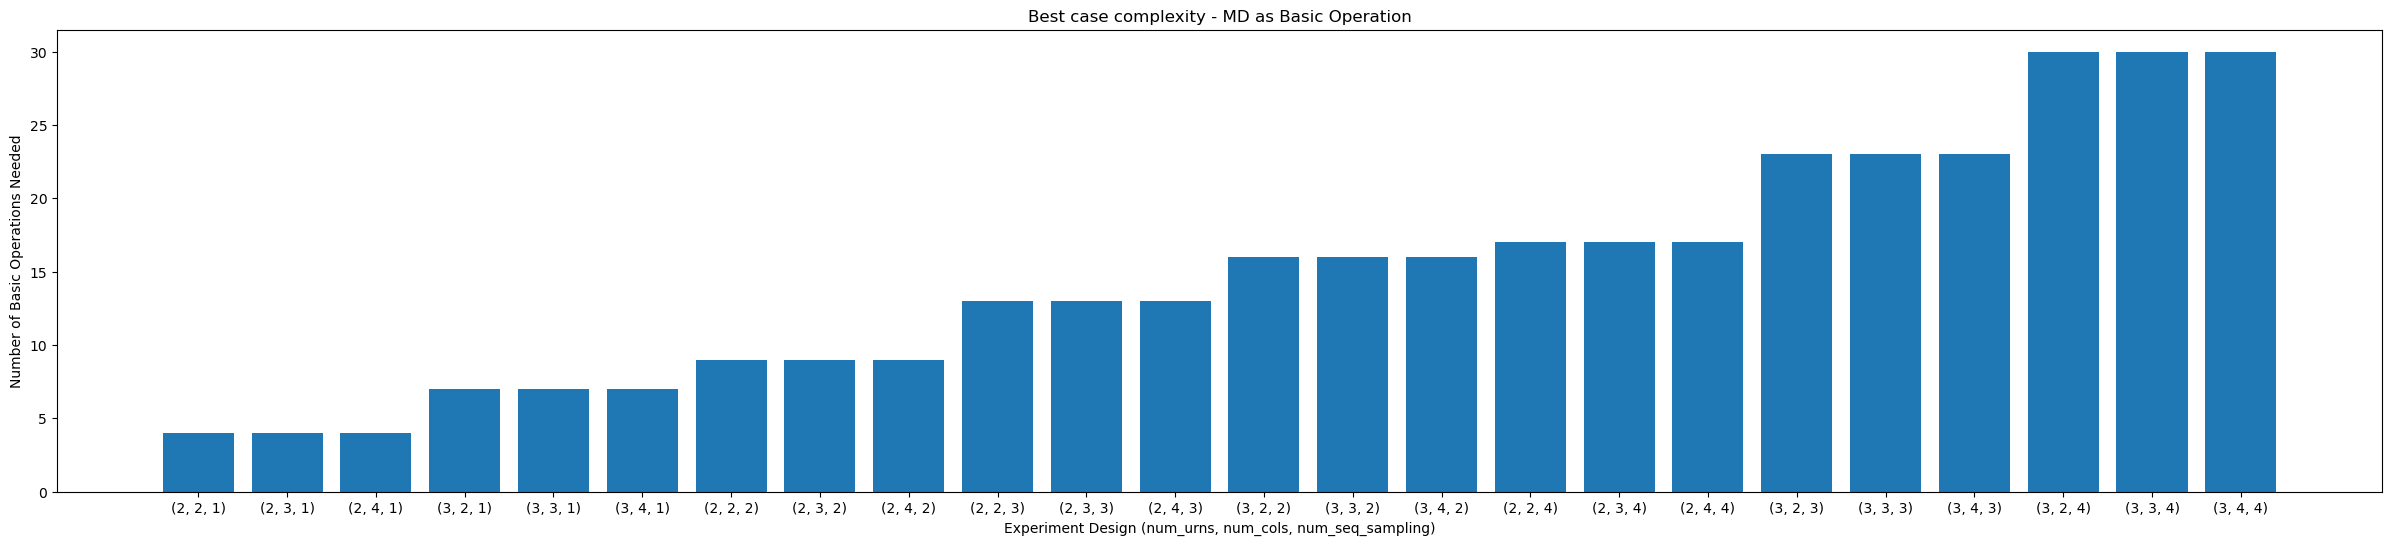

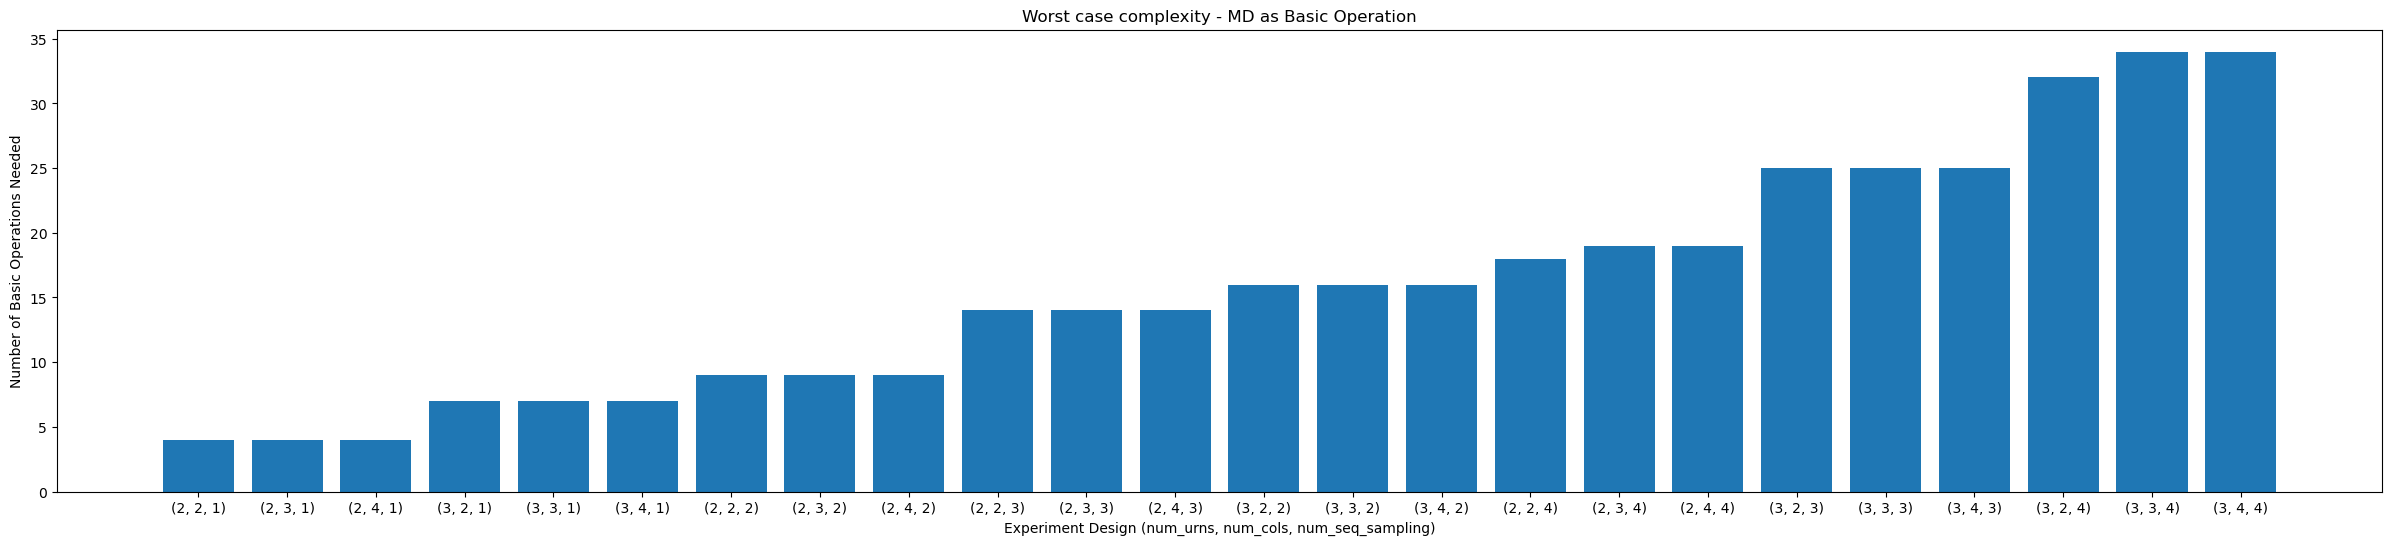

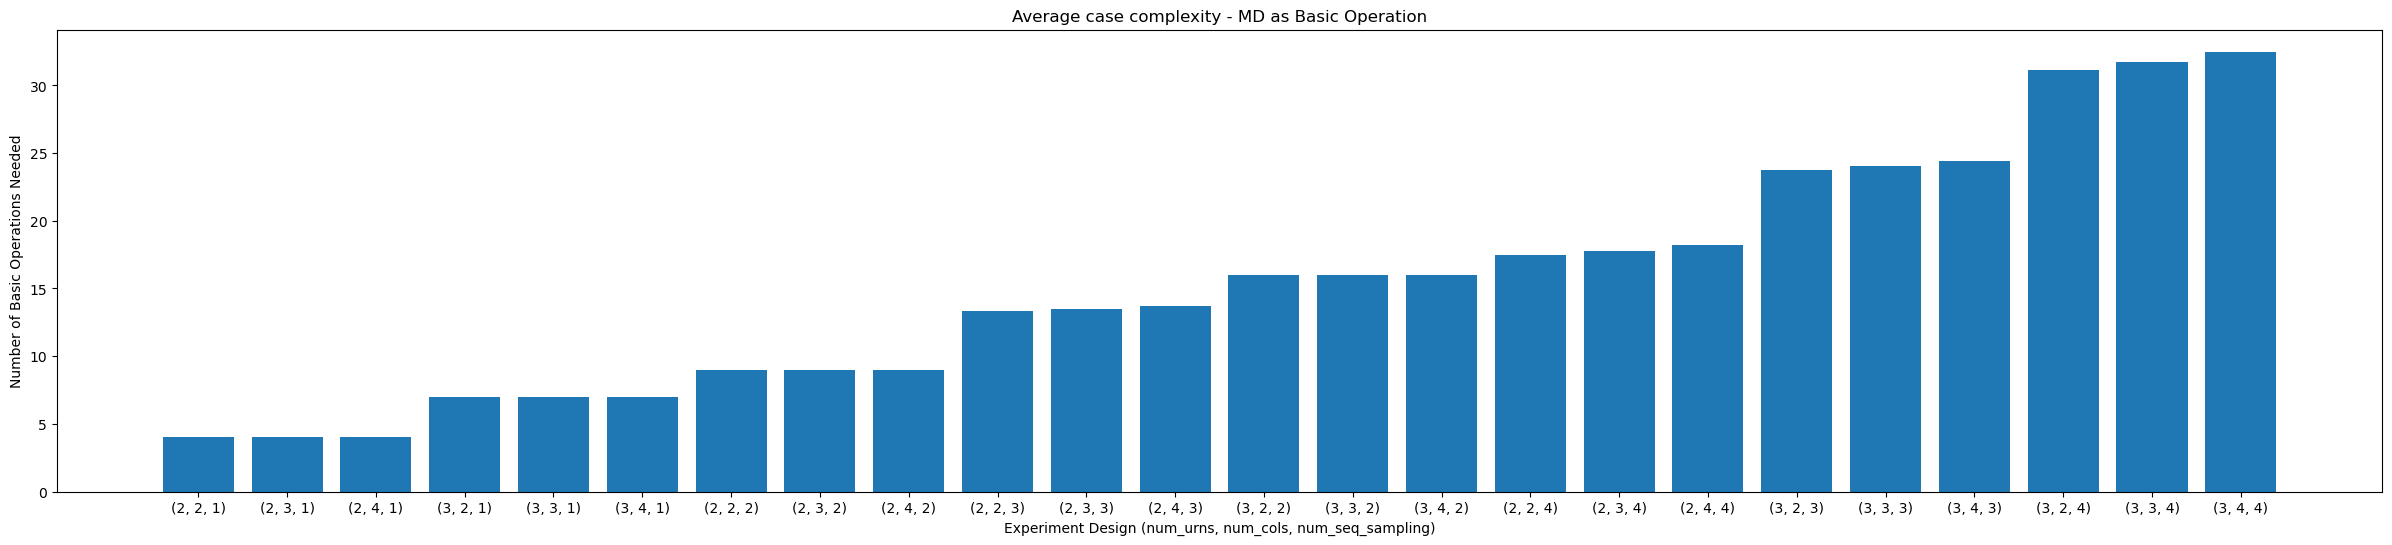

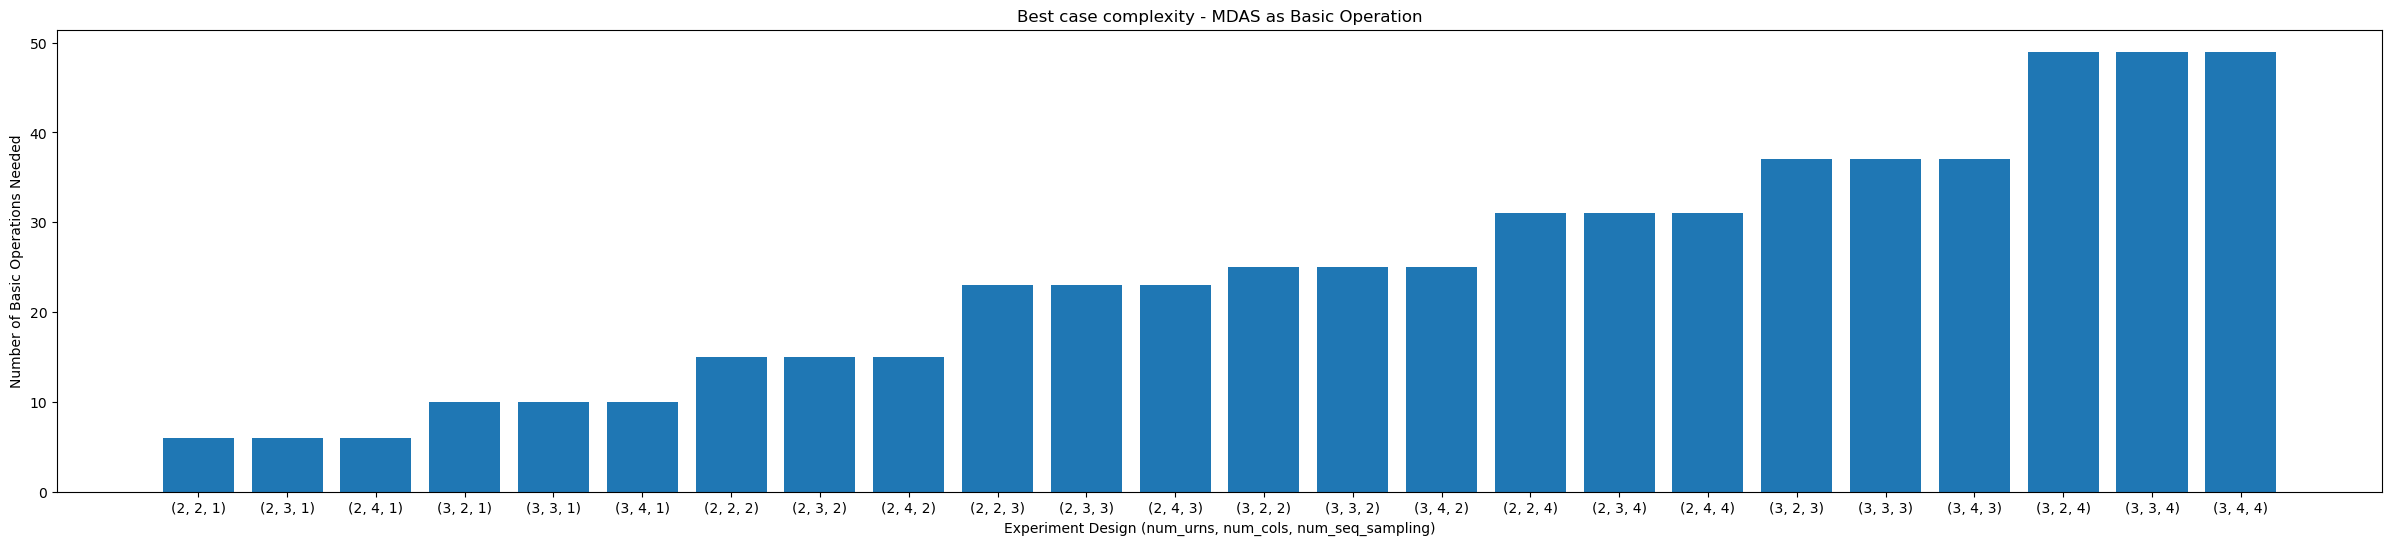

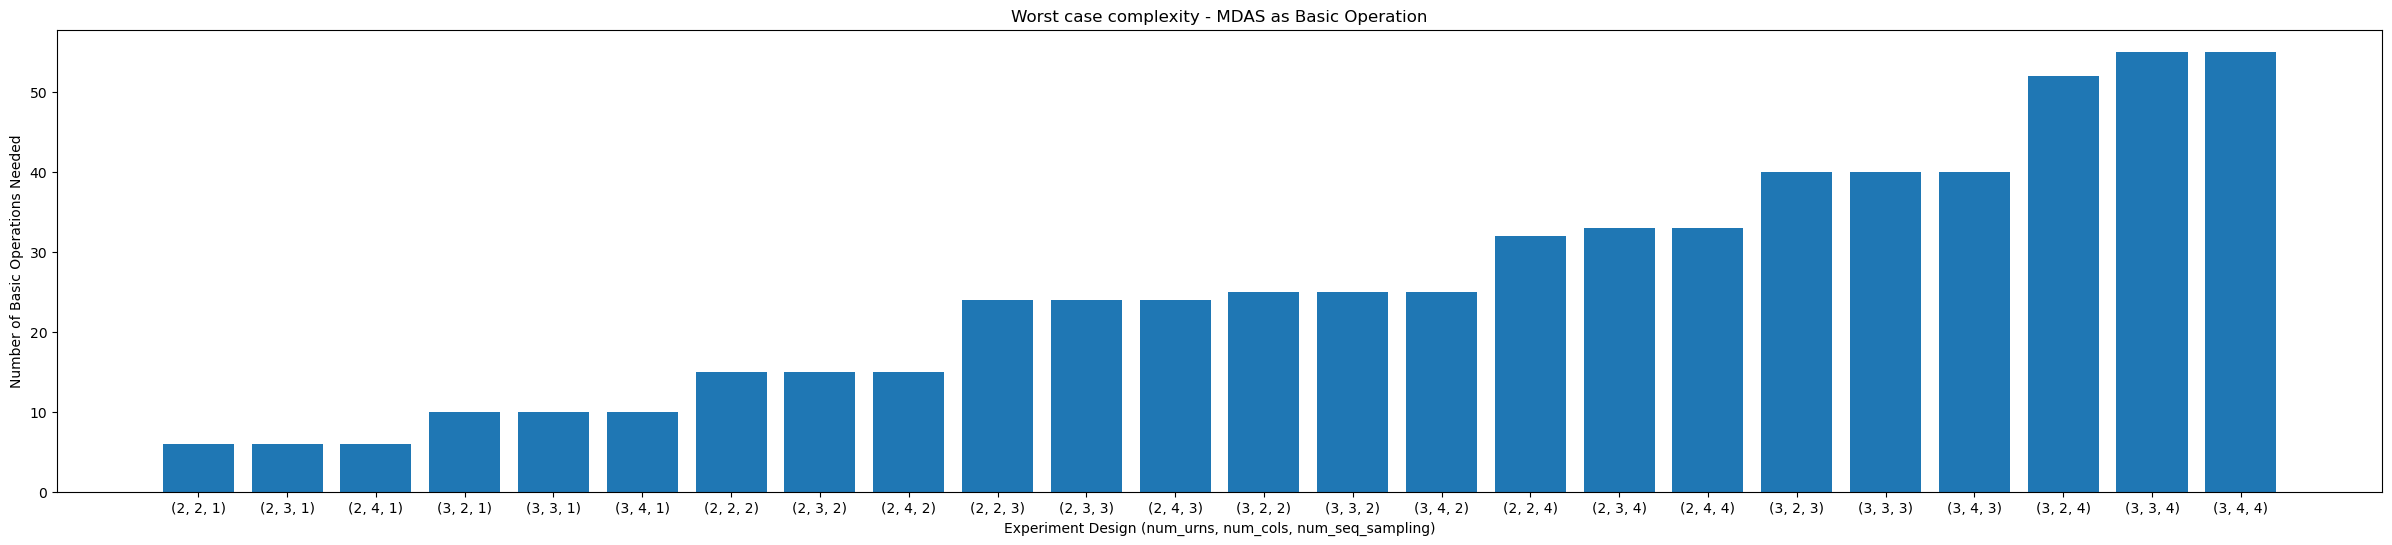

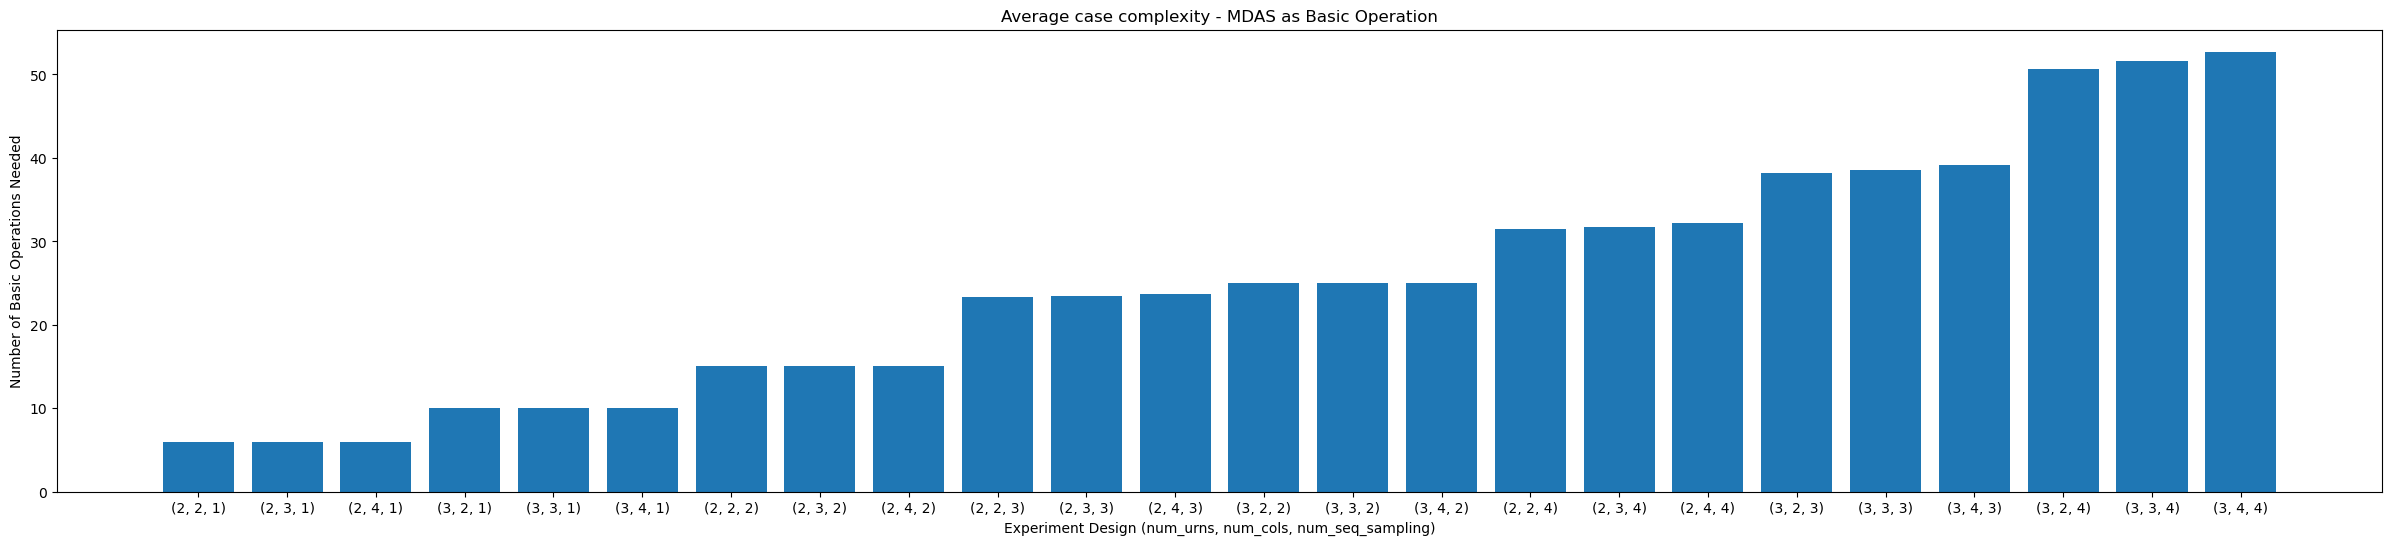

In [ ]:
def visualize(dic, title):
    import matplotlib.pyplot as plt
    sorted_dict = dict(sorted(dic.items(), key=lambda item: item[1]))

    # Extract keys and values from the sorted dictionary
    keys = list(map(str, sorted_dict.keys()))
    values = list(sorted_dict.values())

    # Plot the bar plot
    plt.figure(figsize=(30, 6))
    plt.bar(keys, values)
    plt.xlabel('Experiment Design (num_urns, num_cols, num_seq_sampling)')
    plt.ylabel('Number of Basic Operations Needed')
    plt.title(title)
    plt.show()

visualize(MD_min_dict, 'Best case complexity - MD as Basic Operation')
visualize(MD_max_dict, 'Worst case complexity - MD as Basic Operation')
visualize(MD_avg_dict, 'Average case complexity - MD as Basic Operation')

visualize(MDAS_min_dict, 'Best case complexity - MDAS as Basic Operation')
visualize(MDAS_max_dict, 'Worst case complexity - MDAS as Basic Operation')
visualize(MDAS_avg_dict, 'Average case complexity - MDAS as Basic Operation')

# Insights

1. The best case complexity is not affected by number of colours available. The worst case complexity and average case complexity is affected by colour available only modestly
2. Increase in the number of ball draws seems to have the largest impact on complexity
3. In the easiest case: 2 urns, 2 colours, 1 ball draw, 4 MD and 2 AS are needed to compute the posterior of all urns. If I ask for prediction of the next ball being drawn from the same urn, the calculations required will be even more
4. This problem seems to be Polynomial time. It have an asymptotic complexity of O(n*k)
5. burning question: Should we assume people calculate using fractions or decimals? It will affect number of MD needed and therefore complexity. I assume people use decimals to calculate for now but seems like a lot of people are using fractions. Fraction calculation is also somehow supported by previous studies saying frequencies is easier than probabilities when describing the experimental design and ball compositions.
6. Perhaps we can investigate on the relationship between perceived difficulty and computational complexity within one participant? People may think large number of possible colours are difficult to process but indeed not affecting too much, etc.



Change experimental design to reflect different heuristics: What heuristics to use? Reinforcement, sample mean, inertia, non-updating. inertia and non-updating is probably not that important

Computational complexity in statistical inference

Many economic theorems assumes people can think rationally and can do Bayesian updating and correctly keep track of the evolution of states of the world, probability of events happen. Base on these updated belief, people gonna react to perform optimal decision accordingly to maximize their payoff or utility in game theory.

People believe more evidence is better in statistical inference. Here is the contradictary force, more evidence gives more information but leads to more computations which could leads to worse performance in human behaviour. The benefit does not outweight the cost.

Add one ball or evidence with different difficulty of updating, when easy to update then increase performance quality of posterior. More information is not necessarily important.

Statistical uncertainty together with computational complexity

Finance distribution is not Gaussian. Regieme changes so dist changes

Need lots of samples to understand the distribution other than normal dist, hard to make statistical inference. Sample mean will converge to population mean when sample aproach to infinity but we live in finite world